<a href="https://colab.research.google.com/github/ArocenaAlfredo/Data_science_coderhouse/blob/main/Trabajo_final_Arocena_Alfredo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo final: Entrenamiento y Optimización de modelos de ML

##Introducción

###Abstracto:
Las enfermedades cardiovasculares (ECV) representan un problema de salud pública de gran magnitud a nivel global. Según la Organización Mundial de la Salud (OMS), las ECV son la principal causa de muerte en todo el mundo, causando más de 17 millones de fallecimientos cada año. Estas enfermedades comprenden un conjunto de trastornos que afectan al corazón y a los vasos sanguíneos, tales como la cardiopatía isquémica, los accidentes cerebrovasculares, la insuficiencia cardíaca, y la arteriopatía periférica. El aumento en la prevalencia de las ECV está estrechamente vinculado a una serie de factores de riesgo, tanto modificables como no modificables. Entre los factores de riesgo más importantes se encuentran la hipertensión arterial, la hipercolesterolemia, el tabaquismo, la diabetes, la obesidad y el sedentarismo. Estos factores de riesgo son en gran medida prevenibles, y su control podría reducir significativamente la incidencia de las enfermedades cardiovasculares. La OMS ha subrayado la necesidad de implementar estrategias de prevención y control para reducir el impacto de las ECV. Esto incluye la promoción de hábitos de vida saludables, como una alimentación balanceada, la actividad física regular y la abstinencia del tabaco, así como el acceso a tratamientos médicos efectivos. A pesar de los avances en el diagnóstico y tratamiento, la carga global de las ECV sigue siendo elevada, lo que subraya la urgencia de fortalecer las políticas de salud pública dirigidas a combatir esta epidemia. En este proyecto se propone incluir otros antecedentes a los ya conocidos, que ayuden a predecir el diagnóstico de ECV.

###Objetivo
Teniendo en cuenta el historial clinico de una persona, el objetivo de este trabajo seria predecir con elevado grado de acierto si el paciente puede sufrir ECV.

###Problema comercial
Las enfermedades cardiovasculares (ECV) representan una de las principales causas de mortalidad en la población, superando a muchas otras afecciones. En este contexto, es fundamental identificar de manera temprana los factores de riesgo y las señales que puedan llevar a un diagnóstico de ECV. El objetivo del proyecto es determinar cuáles son las variables clínicas y de comportamiento que tienen un mayor peso en el diagnóstico de ECV. Esto permitirá mejorar la detección y clasificación de pacientes que llegan a servicios hospitalarios, optimizar el tratamiento y, en casos de bajo riesgo, permitir tratamientos ambulatorios o en el llamado "hospital de día." El problema comercial radica en la necesidad de utilizar eficazmente la información clínica y de comportamiento del paciente para predecir el riesgo de ECV y, por lo tanto, mejorar la toma de decisiones médicas y la calidad de la atención.

###Contexto analítico
En el contexto analítico, se busca desarrollar un modelo de machine learning que pueda predecir con alta precisión la probabilidad de que un paciente sufra una enfermedad cardiovascular. Para ello, se utilizarán parámetros clínicos y de comportamiento proporcionados en el conjunto de datos, como edad, sexo, antecedentes familiares, tabaquismo, consumo de alcohol, hipertensión, diabetes, obesidad y otros. Además, se propondrá la inclusión de nuevos antecedentes que puedan mejorar la predicción. Este modelo tendrá aplicaciones prácticas en el campo de la salud, ya que permitirá optimizar la respuesta de los profesionales médicos al recibir a un paciente, facilitando la toma de decisiones sobre estudios, hospitalización o tratamiento. En un entorno de atención médica pública y privada, esto puede resultar en un uso más eficiente de los recursos y una mejora en la calidad de la atención al paciente.

## Carga de Librerías

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install matplotlib_venn

In [ ]:
from matplotlib_venn import venn2

In [ ]:
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

##Dataset: parametros de pacientes con ECV.
Este dataset se nombro ecv y tiene 308854 registros y 19 columnas

In [ ]:
ecv = pd.read_csv('/content/drive/MyDrive/Data science II - Machine learning/Primer entregable Data Science II/Dataset ECV.csv')
ecv.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
ecv.dtypes
#con esta funcion puedo ver que tipo de datos tengo en cada columna.
#A continuacion agrago la descripcion de cada columna, destacando la que sera para predecir.
#General Health: el estado general del paciente, en categoría
#Checkup: Cuándo fue la última vez que el paciente se hizo un chequeo, en texto
#Excercise: Si la persona realiza ejercicio, en Yes/No
#Heart Disease: Si tiene enfermedad cardíaca (Yes,No). ESTE SERÁ EL VALOR A PREDECIR EN EL PROYECTO
#Skin Cancer: si el paciente tiene cáncer de piel (Yes,No)
#Other Cancer: si el paciente tiene otro tipo de cáncer que no sea de piel, (Yes,No)
#Depression: Si fue sufre depresión (Yes,No)
#Diabetes: si tiene diabetes (Yes,No, *algunos tienen notas aparte*)
#Arthritis: si tiene artritis, (Yes,No)
#Sex: género (Male/Female)
#Age Catogory: edad del paciente agrupada en categoría
#Height (cm): Altura del paciente en cm, float
#Weight (kg): peso del paciente en kg, float
#BMI: índice de masa corporal, float
#Smoking History: Si fuma o ha fumado, (Yes,No)
#Alcohol Consumption: Si consume alcohol, en score del 0 al 30
#Fruit Consumption: Consumo de frutas, en score del 0 al 30
#Green Vegetables Consumption: Consumo de vegetales, score del 0 al 128
#Fried Potato Consumption: consumo de frituras, score del 0 al 128

,0
General_Health,object
Checkup,object
Exercise,object
Heart_Disease,object
Skin_Cancer,object
Other_Cancer,object
Depression,object
Diabetes,object
Arthritis,object
Sex,object


In [ ]:
ecv.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [ ]:
ecv.shape

(308854, 19)

In [ ]:
ecv.value_counts('General_Health')

,count
General_Health,
Very Good,110395
Good,95364
Excellent,55954
Fair,35810
Poor,11331


In [ ]:
ecv.value_counts('Checkup')

,count
Checkup,
Within the past year,239371
Within the past 2 years,37213
Within the past 5 years,17442
5 or more years ago,13421
Never,1407


###Preguntas que surgieron
Teniendo en cuenta la informacion que hay en los antescedentes y la informacion que hay en el dataset, surgieron las siguientes preguntas.
1.   ¿Que el paciente tenga Depresion es un valor importante en la ECV?.
2.   ¿Cómo influye la dieta y el sobrepeso en el diagnóstico?
3.   ¿La presencia de un cáncer puede influir en el diagnóstico de ECV?
4.   Con la intencion de conocer el grupo de pacientes que componen el dataset me pregunto¿cuál es su distribución en cuanto a altura y peso?, ¿qué proporción se encuentra en sobrepeso u obesidad?,¿cuál es la distribución de los mismos en los grupos etarios?
5.   ¿Cuanto influye en el diagnostico de ECV el consumo de alcohol y tabaquismo?

## Analisis exploratorio de los datos

### Distribucion de los datos segun el genero

In [ ]:
count_male = ecv['Sex'].value_counts()['Male']
count_female = ecv['Sex'].value_counts()['Female']

Text(0.5, 1.0, 'Distribución de género')

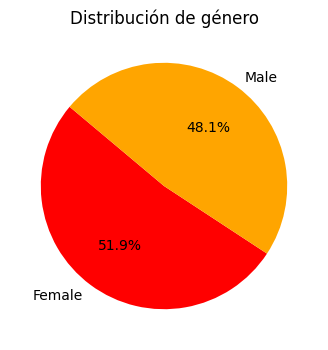

In [ ]:
sex_counts = ecv['Sex'].value_counts()

labels = sex_counts.index
sizes = sex_counts.values

colors = ['red', 'orange']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels= labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de género')

En este gráfico de torta de porcentaje de hombres (Male) y mujeres (Female) del dataset se puede observar una distribución casi del 50% de ambos grupos lo cual nos permitirá dilucidar si el sexo biológico es un factor importante para el diagnóstico de ECV.

###Distribucion por IMC, altura y peso.

Text(0, 0.5, 'Peso (kg)')

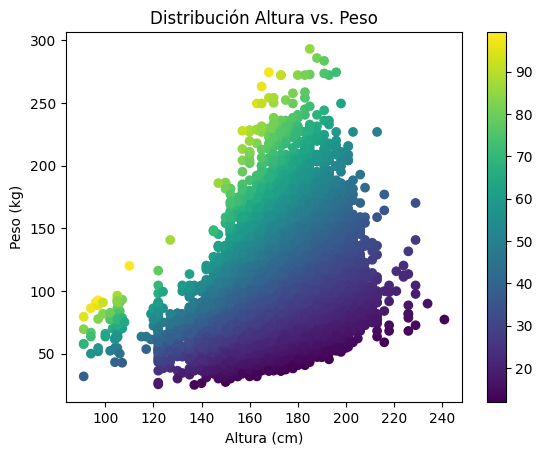

In [ ]:
fig, ax = plt.subplots()
mapeo_colores = ax.scatter(ecv['Height_(cm)'], ecv['Weight_(kg)'], c = ecv['BMI'])
fig.colorbar(mapeo_colores)
ax.set_title('Distribución Altura vs. Peso')
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Peso (kg)')

En este gráfico se observa lo siguiente: se destaca un pequeño grupo de baja estatura y alto IMC, que probablemente sean outliers (Altura < 100 cm). Se observa la zona violeta con una buena correlación lineal de altura vs peso que corresponde a IMC<25, es decir, pacientes sanos. Este gráfico nos muestra una gran cantidad de pacientes con problemas de sobrepeso y obesidad (azul a amarillo).

###Distribucion de los datos por edad

In [ ]:
distinct_count = ecv['Age_Category'].nunique()


print("Distinct Count:", distinct_count)

Distinct Count: 13


In [ ]:
ecv2 = ecv['Age_Category'].sort_values(ascending=True)

(array([18681., 15494., 18428., 20606., 21595., 20968., 25097., 28054.,
        32418., 33434., 31103., 20705., 22271.]),
 array([ 0.        ,  0.92307692,  1.84615385,  2.76923077,  3.69230769,
         4.61538462,  5.53846154,  6.46153846,  7.38461538,  8.30769231,
         9.23076923, 10.15384615, 11.07692308, 12.        ]),
 <BarContainer object of 13 artists>)

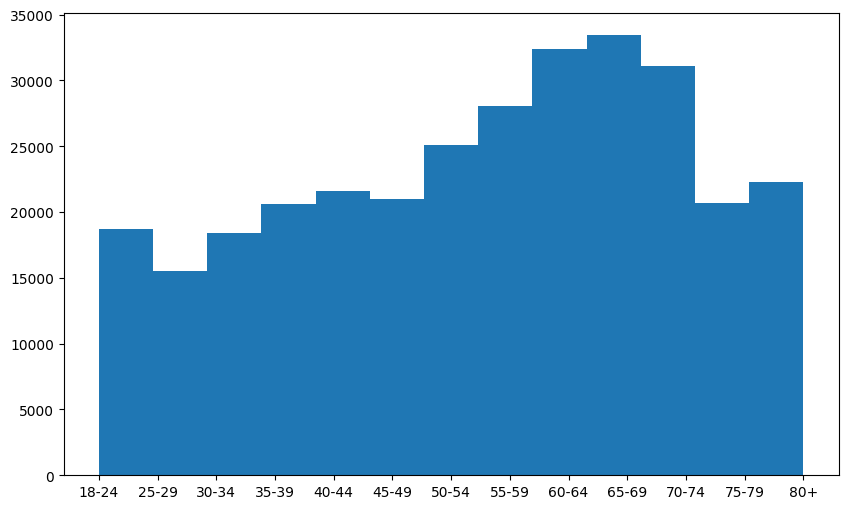

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= ecv2, bins=13, orientation='vertical')

En este gráfico se observa la distribución de los pacientes según su rango etario: la mayor densidad se encuentra entre los valores 50 a 74 años. La gráfica presenta una distribución sesgada a la derecha, ademas muestra que el dataset está conformado por pacientes en su mayoría en edad avanzada.

###Formas de alimentarse

Text(0, 0.5, 'Score')

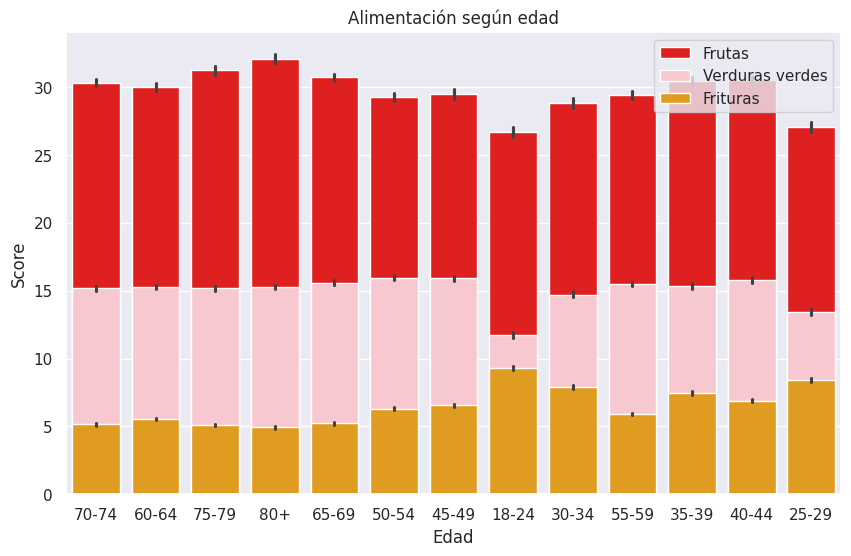

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras agrupadas
sns.barplot(x=ecv['Age_Category'].sort_values(ascending=True), y='Fruit_Consumption', data=ecv, color='red', label='Frutas')
sns.barplot(x=ecv['Age_Category'].sort_values(ascending=True), y='Green_Vegetables_Consumption', data=ecv, color='pink', label='Verduras verdes')
sns.barplot(x=ecv['Age_Category'].sort_values(ascending=True), y='FriedPotato_Consumption', data=ecv, color='orange', label='Frituras')

# Añadir leyenda y etiquetas
plt.legend(loc='upper right')
plt.title('Alimentación según edad')
plt.xlabel('Edad')
plt.ylabel('Score')

En este gráfico de distribución se coloca en el eje x la edad de los pacientes por categoría y las barras apiladas ilustran el score del consumo de cada tipo de alimento mencionado. Aunque el consumo de frutas parece mantenerse constante entre los grupos, se observa una dosminución en el consumo de frituras y una mayor ingesta de verduras verdes. Es decir, a medida que los pacientes avanzan en edad, su alimentación se va volviendo más saludable.

### Relacion con habitos de consumo y depresion con ECV

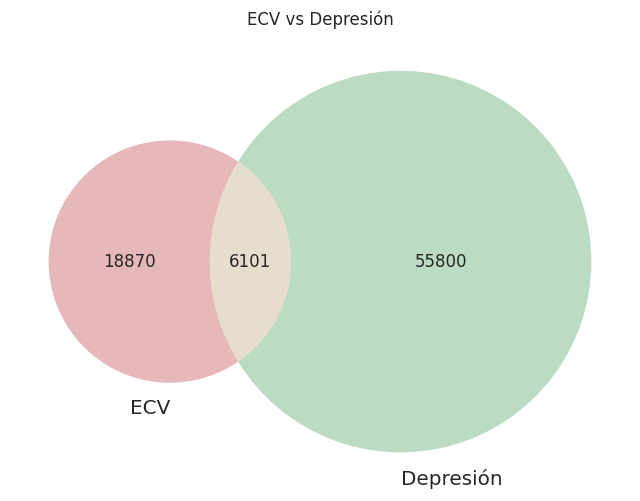

In [ ]:
# Contar la cantidad de personas con y sin cada condición
heart_disease = set(ecv[ecv['Heart_Disease'] == 'Yes'].index)
depression = set(ecv[ecv['Depression'] == 'Yes'].index)
both_conditions = set(ecv[(ecv['Heart_Disease'] == 'Yes') & (ecv['Depression'] == 'Yes')].index)

# Crear el diagrama de Venn
from matplotlib_venn import venn2
venn_labels = {'100': len(heart_disease - both_conditions),
               '010': len(depression - both_conditions),
               '110': len(both_conditions)}

plt.figure(figsize=(8, 8))
venn_diagram = venn2(subsets=(len(heart_disease - both_conditions),
                              len(depression - both_conditions),
                              len(both_conditions)),
                     set_labels=('ECV', 'Depresión'))
venn_diagram.get_label_by_id('100').set_text(venn_labels['100'])
venn_diagram.get_label_by_id('010').set_text(venn_labels['010'])
venn_diagram.get_label_by_id('110').set_text(venn_labels['110'])

plt.title('ECV vs Depresión')
plt.show()

En este gráfico se intentó observar rápidamente la cantidad de pacientes que tienen depresion y ECV mediante un diagrama de Venn. El grupo del medio es el que padece ambas enfermedades. Sin embargo, no se descarta que sea importante y, por lo tanto, obtendremos un porcentaje de los mismos.

In [ ]:
porcentaje=6101/(18870+6101)*100
print(porcentaje)

24.432341516158747


El 24 % de las personas que sufren ECV padecen depresion

Consumo de alcohol

In [ ]:
score_alcohol = ecv['Alcohol_Consumption'].nunique()

score_alcohol

31

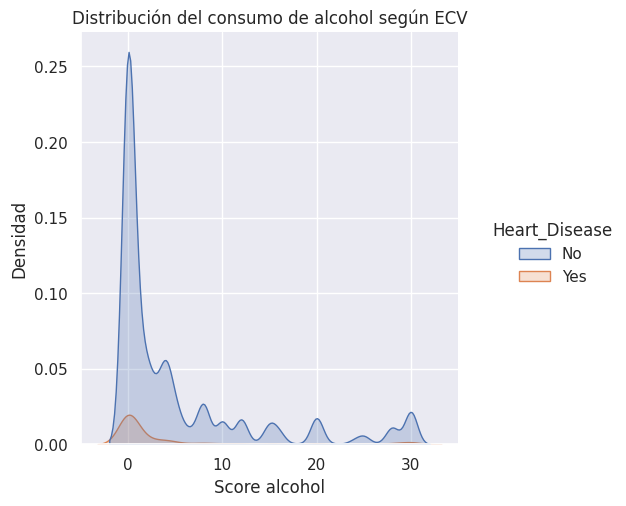

In [ ]:
g = sns.displot(data=ecv, x='Alcohol_Consumption', hue= 'Heart_Disease', kind='kde', fill=True)
g.set(xlabel='Score alcohol', ylabel='Densidad', title='Distribución del consumo de alcohol según ECV')
ax = g.ax

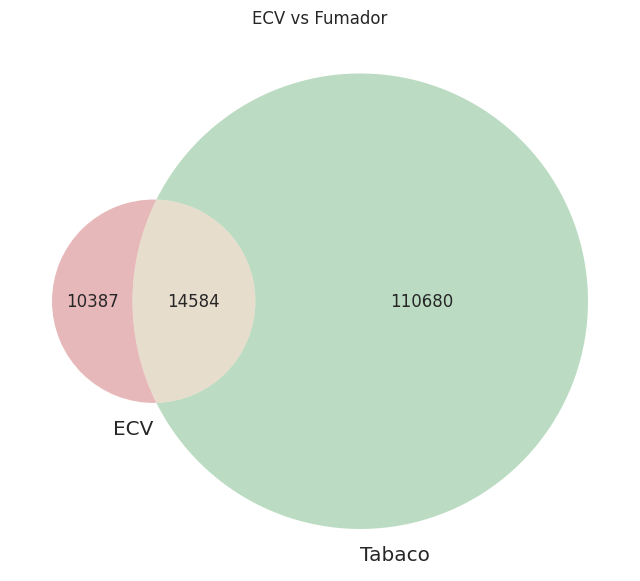

In [ ]:
# Contar la cantidad de personas con y sin cada condición
heart_disease = set(ecv[ecv['Heart_Disease'] == 'Yes'].index)
Fumador = set(ecv[ecv['Smoking_History'] == 'Yes'].index)
both_conditions = set(ecv[(ecv['Heart_Disease'] == 'Yes') & (ecv['Smoking_History'] == 'Yes')].index)

# Crear el diagrama de Venn
venn_labels = {'100': len(heart_disease - both_conditions),
               '010': len(Fumador - both_conditions),
               '110': len(both_conditions)}

plt.figure(figsize=(8, 8))
venn_diagram = venn2(subsets=(len(heart_disease - both_conditions),
                              len(Fumador - both_conditions),
                              len(both_conditions)),
                     set_labels=('ECV', 'Tabaco'))
venn_diagram.get_label_by_id('100').set_text(venn_labels['100'])
venn_diagram.get_label_by_id('010').set_text(venn_labels['010'])
venn_diagram.get_label_by_id('110').set_text(venn_labels['110'])

plt.title('ECV vs Fumador')
plt.show()

###Relacion de personas sanas y enfermas

Text(0.5, 1.0, 'Sanos vs enfermos')

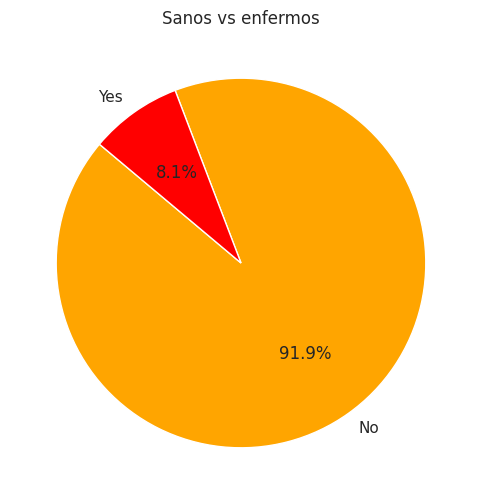

In [ ]:
num_enf = ecv['Heart_Disease'].value_counts()['Yes']
num_sanos = ecv['Heart_Disease'].value_counts()['No']

enf_Counts = ecv['Heart_Disease'].value_counts()

labels = enf_Counts.index
sizes = enf_Counts.values

colors = ['orange', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Sanos vs enfermos')

La mayoría de los pacientes de este set de datos son pacientes sanos para ECV, lo cual presenta un importante desbalanceo de clases.

### IMC vs Genero

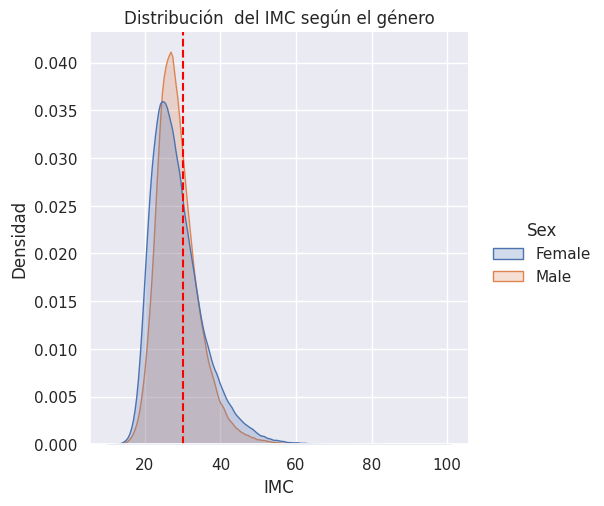

In [ ]:
g = sns.displot(data=ecv, x='BMI', hue= 'Sex', kind='kde', fill=True)
g.set(xlabel='IMC', ylabel='Densidad', title='Distribución  del IMC según el género')
ax = g.ax
ax.axvline(x=30, color='red', linestyle='--', label='Obesidad')

El Índice de masa corporal (IMC) permite relacionar los datos de altura y peso de manera de establecer si el paciente padece sobrepeso (>25) u obesidad (>30). De este gráfico podemos encontrar la distribución de los pacientes difrenciados por género según su IMC. Se puede ver un alto porcentaje de pacientes con obesidad en ambos grupos, aunque la curva de hombres parece ser más angosta y desplazada a la derecha que la de mujeres. Para sacar una conclusión más certera de este dataset, se debería en un primer momento analizar el área bajo la curva y calcular la media y la mediana de ambos grupos.

In [ ]:
media_por_grupo = ecv.groupby('Sex')['BMI'].mean()

print(media_por_grupo)

Sex
Female    28.557168
Male      28.700612
Name: BMI, dtype: float64


In [ ]:
mediana_por_grupo = ecv.groupby('Sex')['BMI'].median()

print(mediana_por_grupo)

Sex
Female    27.37
Male      27.80
Name: BMI, dtype: float64


### IMC en personas sanas y en pacientes con ECV

[Text(0.5, 0, 'Enfermedad Cardíaca'),
 Text(0, 0.5, 'IMC'),
 Text(0.5, 1.0, 'Comparación IMC sanos y enfermos')]

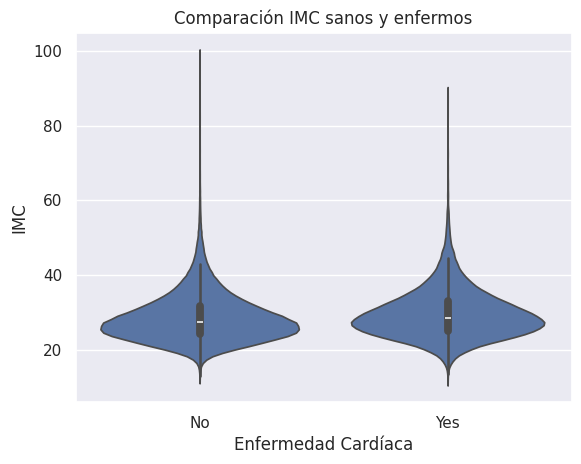

In [ ]:
ax = sns.violinplot(data=ecv, x='Heart_Disease', y='BMI')
ax.set(xlabel='Enfermedad Cardíaca', ylabel='IMC', title='Comparación IMC sanos y enfermos')

Al analizar estos gráficos no parece haber una diferencia significativa en la distribución de IMC en ambos grupos de pacientes. Por lo tanto el IMC no es un condicionamiento para el desarrollo de ECV.

<ipython-input-28-04239a5aab70>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Category', y='Count', data=ecv_por_edad, palette='magma')


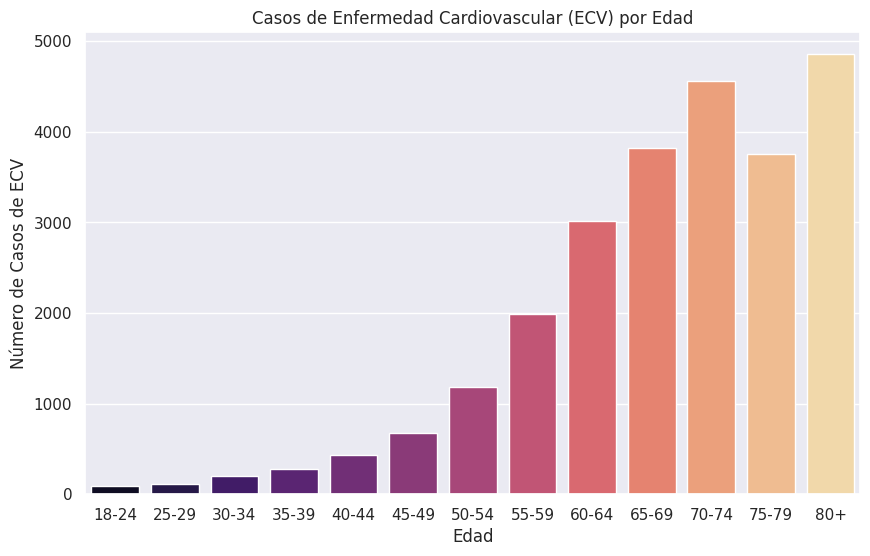

In [ ]:
#Filtrar casos de enfermedad cardiovascular
ecv_positivos = ecv[ecv['Heart_Disease'] == 'Yes']

# Contar casos agrupados por la variable 'General_Health'
ecv_por_edad = ecv_positivos.groupby('Age_Category').size().reset_index(name='Count')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Count', data=ecv_por_edad, palette='magma')
plt.title('Casos de Enfermedad Cardiovascular (ECV) por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Casos de ECV')
plt.show()

En este grafico se utilizaron los datos transformados anteriormente y se comparó la cantidad de casos de ECV según la edad. Se puede observar cómo la mayoría de los casos se encuentran en el grupo de edades avanzadas.

###Relacion entre ECV y Estados de salud

<ipython-input-29-cbff12c50293>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='General_Health', y='Count', data=ecv_by_health, palette='magma')


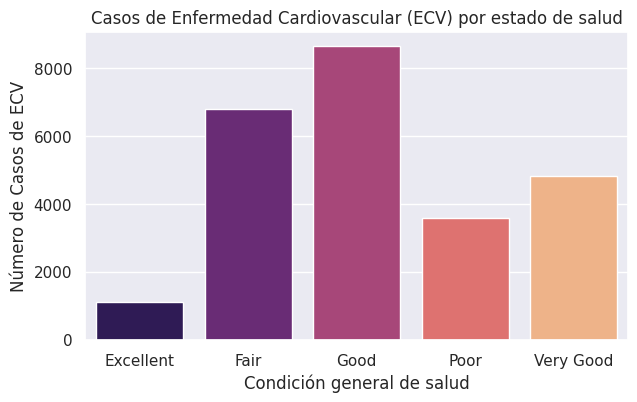

In [ ]:
# Filtrar casos de enfermedad cardiovascular
ecv_positivos = ecv[ecv['Heart_Disease'] == 'Yes']

# Contar casos agrupados por la variable 'General_Health'
ecv_by_health = ecv_positivos.groupby('General_Health').size().reset_index(name='Count')

# Crear el gráfico de barras
plt.figure(figsize=(7, 4))
sns.barplot(x='General_Health', y='Count', data=ecv_by_health, palette='magma')
plt.title('Casos de Enfermedad Cardiovascular (ECV) por estado de salud')
plt.xlabel('Condición general de salud')
plt.ylabel('Número de Casos de ECV')
plt.show()

###Relacion entre ECV y los chequeos

<ipython-input-30-4f474d14b9ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Checkup', y='Count', data=ecv_by_chequeo, palette='magma')


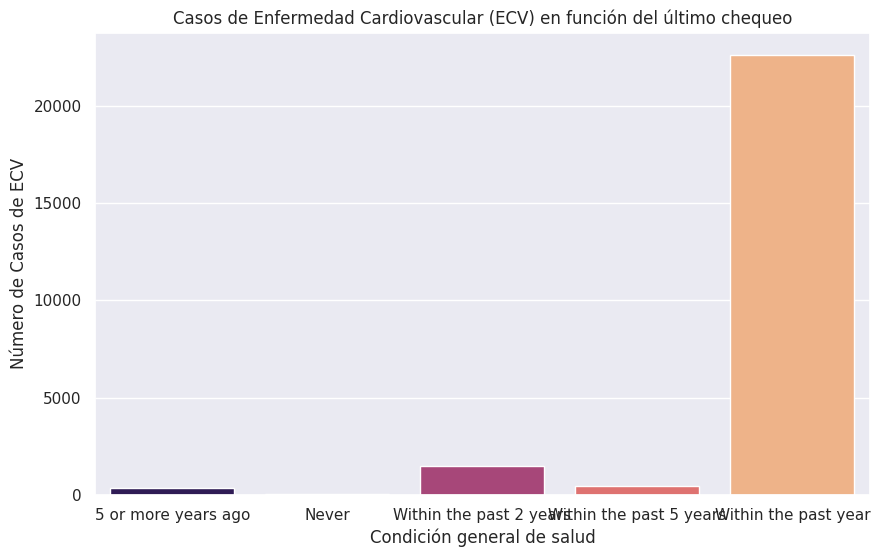

In [ ]:
# Filtrar casos de enfermedad cardiovascular
ecv_positivos = ecv[ecv['Heart_Disease'] == 'Yes']

# Contar casos agrupados por la variable 'Checkup'
ecv_by_chequeo = ecv_positivos.groupby('Checkup').size().reset_index(name='Count')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Checkup', y='Count', data=ecv_by_chequeo, palette='magma')
plt.title('Casos de Enfermedad Cardiovascular (ECV) en función del último chequeo')
plt.xlabel('Condición general de salud')
plt.ylabel('Número de Casos de ECV')
plt.show()

##Limpieza del dataset y feature selection

In [ ]:
# Se realizaron algunas transformaciones de las columnas 'object' que contenían datos categóricos como Yes/No, Male/Female, o el rango de edad.
ecv['General_Health'] = ecv['General_Health'].map({'Poor': 1, 'Fair': 2, 'Excellent': 3, 'Good': 4, 'Very Good': 5})
ecv['Checkup'] = ecv['Checkup'].map({'Never': 1, '5 or more years ago': 2, 'Within the past 5 years': 3, 'Within the past 2 years': 4, 'Within the past year': 5})
ecv['Exercise'] = ecv['Exercise'].map({'Yes': 1.0, 'No': 0.0})
ecv['Heart_Disease'] = ecv['Heart_Disease'].map({'Yes': 1.0, 'No': 0.0})
ecv['Skin_Cancer'] = ecv['Skin_Cancer'].map({'Yes': 1.0, 'No': 0.0})
ecv['Other_Cancer'] = ecv['Other_Cancer'].map({'Yes': 1.0, 'No': 0.0})
ecv['Depression'] = ecv['Depression'].map({'Yes': 1.0, 'No': 0.0})
ecv['Diabetes'] = ecv['Diabetes'].map({'Yes': 1.0, 'No': 0.0})
ecv['Arthritis'] = ecv['Arthritis'].map({'Yes': 1.0, 'No': 0.0})
ecv['Sex'] = ecv['Sex'].map({'Male': 1.0, 'Female': 0.0})
ecv['Smoking_History'] = ecv['Smoking_History'].map({'Yes': 1.0, 'No': 0.0})
ecv['Age_Category'] = ecv['Age_Category'].map({'18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69':10, '70-74': 11, '75-79':12, '80+': 13})

In [ ]:
ecv.dtypes# se corrobora que los datos se hayan cambiado correctamente

,0
General_Health,int64
Checkup,int64
Exercise,float64
Heart_Disease,float64
Skin_Cancer,float64
Other_Cancer,float64
Depression,float64
Diabetes,float64
Arthritis,float64
Sex,float64


In [ ]:
nan_counts = ecv.isna().sum()

print(nan_counts)

General_Health                     0
Checkup                            0
Exercise                           0
Heart_Disease                      0
Skin_Cancer                        0
Other_Cancer                       0
Depression                         0
Diabetes                        9542
Arthritis                          0
Sex                                0
Age_Category                       0
Height_(cm)                        0
Weight_(kg)                        0
BMI                                0
Smoking_History                    0
Alcohol_Consumption                0
Fruit_Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato_Consumption            0
dtype: int64


In [ ]:
ecv3 = ecv.dropna(subset=['Diabetes'])

In [ ]:
nan_counts = ecv3.isna().sum()#se corrobora que se hayan eliminado los datos Nann
print(nan_counts)

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


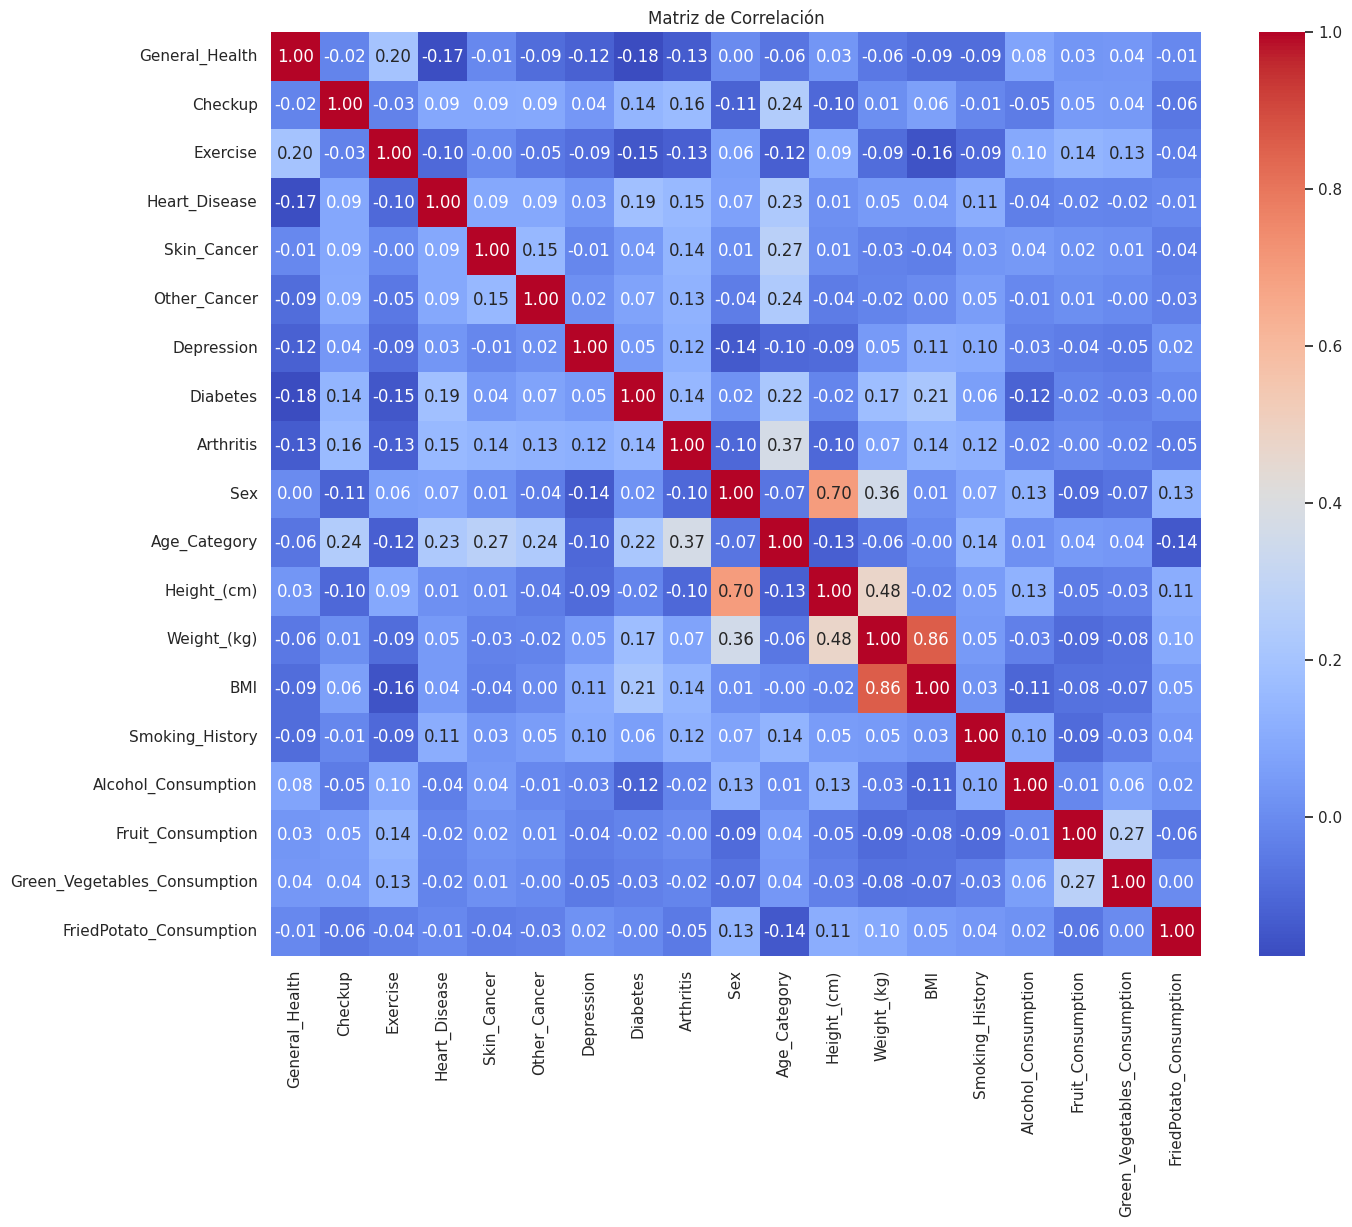

In [ ]:
correlation_matrix = ecv3.corr()
plt.figure(figsize=(15, 12))

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Configurar el título del gráfico
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()

In [ ]:
selected_features = correlation_matrix['Heart_Disease'][abs(correlation_matrix['Heart_Disease']) > 0.14].index.tolist()

print(selected_features)

['General_Health', 'Heart_Disease', 'Diabetes', 'Arthritis', 'Age_Category']


Según este análisis, las features que mejor correlacionan con la presencia de ECV son Diabetes, Artritis, Edad y estado de salud general.

##Árbol de decisión

In [ ]:
# Seleccionar las columnas relevantes

ecv4 = ecv3[['General_Health', 'Heart_Disease', 'Diabetes', 'Arthritis', 'Age_Category','Smoking_History']]

# Dividir en características (X) y variable objetivo (y)
X = ecv4.drop(['Heart_Disease'], axis=1)
y = ecv4[['Heart_Disease']]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

Accuracy: 0.9211031856071363
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     55147
         1.0       0.49      0.03      0.05      4716

    accuracy                           0.92     59863
   macro avg       0.70      0.51      0.50     59863
weighted avg       0.89      0.92      0.89     59863



###Matriz de confusión del Árbol de Decisión

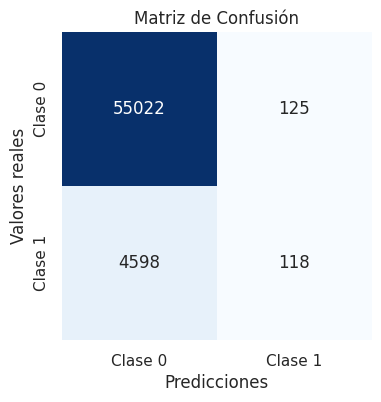

In [ ]:
# Calcular la matriz de confusión
predictions = model.predict(X_test)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

###Insight
Aunque el modelo tiene una precisión global alta (92%), está fallando considerablemente al predecir la clase minoritaria (personas con enfermedad cardíaca). El recall para esta clase es muy bajo (3%), lo que significa que el modelo rara vez detecta correctamente a las personas con enfermedad cardíaca. Esto podría deberse a un desbalance en los datos, donde hay muchas más personas sin enfermedad cardíaca que con ella. Se evaluaran otros modelos

##Algoritmo de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y la variable objetivo (y)
X = ecv4.drop('Heart_Disease', axis=1)
y = ecv4['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = random_forest_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Imprimir el informe de clasificación
print('\nClassification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     55147
         1.0       0.48      0.02      0.04      4716

    accuracy                           0.92     59863
   macro avg       0.70      0.51      0.50     59863
weighted avg       0.89      0.92      0.89     59863



###Matriz de confusión de RF

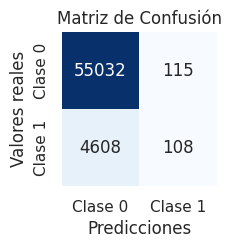

In [ ]:
# Calcular la matriz de confusión
predictions = random_forest_model.predict(X_test)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

###Random Forest con validación cruzada

In [ ]:
# División de datos en entrenamiento y prueba
X = ecv3.drop('Heart_Disease', axis=1)  # Características
y = ecv3['Heart_Disease']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Entrenamiento del modelo de Random Forest con validación cruzada
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')  # Puedes cambiar la métrica de evaluación según tus necesidades

# Mostrar los resultados de la validación cruzada
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Entrenar el modelo en todo el conjunto de entrenamiento
rf.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.91902276 0.9194195  0.91845897 0.91860514 0.9188749 ]
Mean CV accuracy: 0.9188762533927676
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     55047
         1.0       0.50      0.03      0.06      4816

    accuracy                           0.92     59863
   macro avg       0.71      0.52      0.51     59863
weighted avg       0.89      0.92      0.89     59863



###Importancia de las caracteristicas del algoritmo de Random Forest

In [ ]:
rf.feature_importances_
#Importancia de las características (feature importance): Cada valor en este arreglo indica qué tan importante fue una característica particular para la construcción de los árboles de decisión dentro del modelo de Random Forest. Los valores suman aproximadamente 1 (o 100% si lo piensas en términos de porcentaje).
#Interpretación: Un valor más alto significa que esa característica contribuyó más a las decisiones de los árboles para hacer predicciones. Una característica con un valor más bajo significa que tuvo menos impacto en las decisiones del modelo.

array([0.09697663, 0.02203162, 0.0151695 , 0.01256176, 0.01348647,
       0.01404894, 0.03786419, 0.03339946, 0.02042135, 0.16917217,
       0.07207671, 0.09735354, 0.11212309, 0.02055975, 0.05195777,
       0.06996138, 0.07243326, 0.0684024 ])

<BarContainer object of 18 artists>

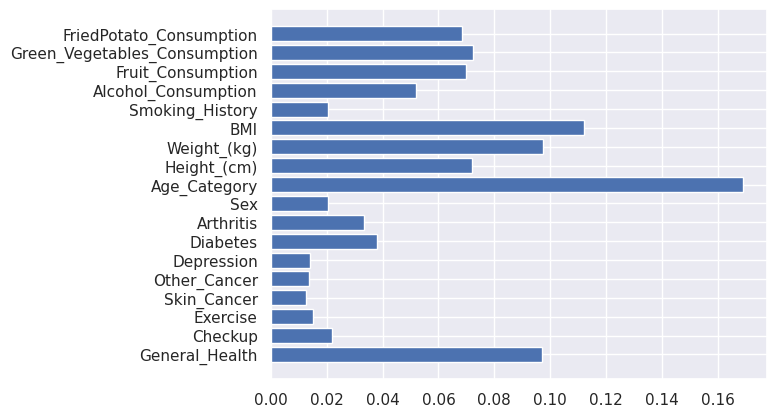

In [ ]:
plt.barh(X_train.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

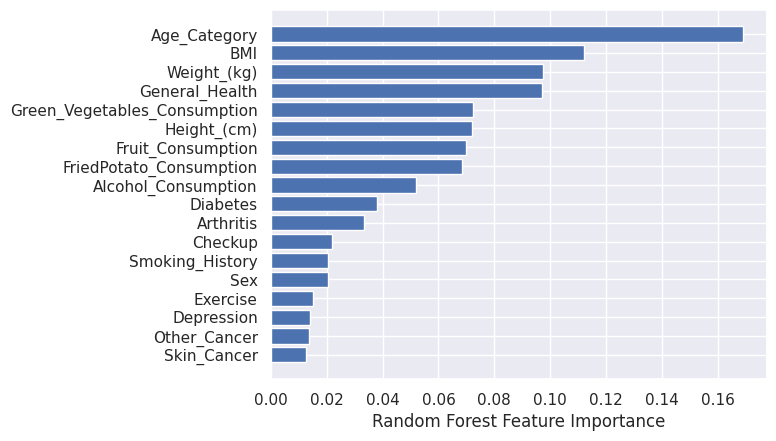

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

###Insight

El modelo de Random Forest, mejora respecto al modelo de Árbol de decisión la predicción de los valores positivos y se puede observar además cuáles son las variables que tienen mayor peso en el output postivo. Sin embargo, el modelo sigue siendo insuficiente para la decisión clínica. Hay muchas más personas sin enfermedad cardíaca que con enfermedad cardíaca, lo que hace que el modelo se enfoque en predecir correctamente la clase mayoritaria y descuide la minoritaria
Para mejorar los parámetros de predicción obtenidos en el modelo de Random Forest, se usará en primer lugar un modelo de Gradient Boosting, luego se utilizara un modelo de Regresión Logística con ajuste de los hiperparámetros para clases desbalanceadas.

## Modelo de Gradient Boosting
Modelos como Gradient Boosting o XGBoost a veces pueden manejar mejor el desbalance de clases. Por lo tanto vamos a establecerlo para ver como dan los resultados.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# División de datos en entrenamiento y prueba
X = ecv3.drop('Heart_Disease', axis=1)  # Características
y = ecv3['Heart_Disease']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear el modelo de Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Validación cruzada para evaluar el rendimiento del modelo
cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Entrenar el modelo en todo el conjunto de entrenamiento
gb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = gb.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtener la importancia de las características
importances = gb.feature_importances_

# Mostrar las características ordenadas por importancia
import pandas as pd
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Cross-validation scores: [0.92006682 0.91950303 0.91969096 0.91987889 0.92037837]
Mean CV accuracy: 0.9199036140253707
Accuracy: 0.9201844210948332
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     55047
         1.0       0.55      0.04      0.08      4816

    accuracy                           0.92     59863
   macro avg       0.74      0.52      0.52     59863
weighted avg       0.89      0.92      0.89     59863

Feature Importances:
                         Feature  Importance
9                   Age_Category    0.364404
0                 General_Health    0.340510
6                       Diabetes    0.112332
8                            Sex    0.089140
13               Smoking_History    0.030784
7                      Arthritis    0.027512
14           Alcohol_Consumption    0.008498
1                        Checkup    0.005928
12                           BMI    0.005450
3                    Skin_Cance

###Insight
El rendimiento en la clase mayoritaria (0.0, sin enfermedad cardíaca): El modelo tiene un excelente rendimiento, lo que es esperado ya que esta clase tiene muchos más ejemplos en los datos.
El rendimiento en la clase minoritaria (1.0, con enfermedad cardíaca): Aunque la precisión (0.55) ha mejorado en comparación con los modelos anteriores, el recall sigue siendo muy bajo (0.04), lo que indica que el modelo está fallando en identificar correctamente la mayoría de los casos de enfermedad cardíaca.
Importancia de las características: El modelo se basa principalmente en la edad, el estado de salud general y la diabetes para hacer las predicciones. Otras características, como el sexo y el historial de tabaquismo, también tienen cierta importancia.

##Algoritmo de Regresión Logística

###Manejo de datos desbalanceados

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = ecv3.drop('Heart_Disease', axis=1)  # Características
y = ecv3['Heart_Disease']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#stratify=y, se usa para asegurar que la proporción de clases (personas con y sin enfermedad cardíaca)
# sea la misma tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto es importante para obtener un modelo más robusto
# Initialize the logistic regression model
model2 = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")

# Train the model
model2.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

Accuracy: 0.7279885070271955


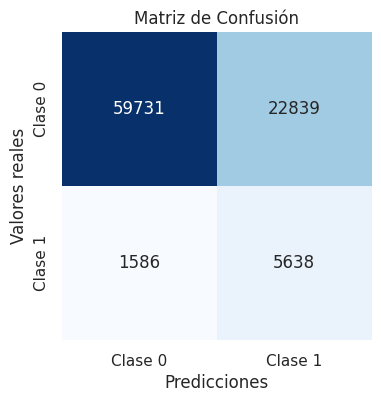

In [ ]:
# Predict on the test set
y_pred = model2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

from sklearn.metrics import roc_auc_score
y_prob = model2.predict_proba(X_test)[:, 1]  # Predict probabilities
auc_roc = roc_auc_score(y_test, y_prob)

print("AUC-ROC:", auc_roc)

print("F1-score:", f1)

print("Recall:", recall)

print("Precision:", precision)

# Evaluación del modelo en el conjunto de prueba
y_pred = model2.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC: 0.8272701265854363
F1-score: 0.31584549452396293
Recall: 0.780454042081949
Precision: 0.19798433823787617
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     82570
         1.0       0.20      0.78      0.32      7224

    accuracy                           0.73     89794
   macro avg       0.59      0.75      0.57     89794
weighted avg       0.91      0.73      0.79     89794



###Insight
Lo favorable de este modelo es que tiene un buen recall para la clase 1 (78%), lo cual es crucial en este tipo de problemas, ya que es importante detectar la mayoría de los casos de enfermedad cardíaca.
El AUC-ROC es sólido, lo que indica que el modelo tiene un buen poder discriminatorio.
Lo que se podria mejorar es que la precisión en la clase 1 es baja (0.20), lo que significa que el modelo predice muchos falsos positivos (personas que no tienen la enfermedad pero el modelo predice que sí). Esto es importante, ya que un bajo valor de precisión puede generar muchas alarmas innecesarias.
El F1-score para la clase 1 también es bajo (0.32), lo que indica que hay un desbalance significativo entre la precisión y el recall.

###Regresión Logística con Stratified K-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Separar características y variable objetivo
X = ecv3.drop('Heart_Disease', axis=1)  # Características
y = ecv3['Heart_Disease']  # Variable objetivo

# Inicializar Stratified K-Fold con 5 pliegues
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar un clasificador de regresión logística
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Lista para almacenar resultados de cada pliegue
scores = []

# Realizar la validación cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenar modelo de regresión logística
    log_reg.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = log_reg.predict(X_test)

    # Evaluar el modelo
    score = log_reg.score(X_test, y_test)
    scores.append(score)

    # Imprimir informe de clasificación
    print("Classification Report for Fold:")
    print(classification_report(y_test, y_pred))

# Mostrar los resultados de la validación cruzada
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Fold:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     55047
         1.0       0.20      0.78      0.32      4816

    accuracy                           0.73     59863
   macro avg       0.59      0.75      0.57     59863
weighted avg       0.91      0.73      0.79     59863



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Fold:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     55046
         1.0       0.19      0.78      0.31      4817

    accuracy                           0.72     59863
   macro avg       0.58      0.75      0.57     59863
weighted avg       0.91      0.72      0.78     59863



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Fold:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     55046
         1.0       0.20      0.78      0.32      4816

    accuracy                           0.73     59862
   macro avg       0.59      0.75      0.57     59862
weighted avg       0.91      0.73      0.79     59862



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Fold:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     55046
         1.0       0.20      0.78      0.31      4816

    accuracy                           0.73     59862
   macro avg       0.59      0.75      0.57     59862
weighted avg       0.91      0.73      0.79     59862

Classification Report for Fold:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     55046
         1.0       0.20      0.78      0.31      4816

    accuracy                           0.73     59862
   macro avg       0.59      0.75      0.57     59862
weighted avg       0.91      0.73      0.79     59862

Cross-validation scores: [0.7290145832985316, 0.720779112306433, 0.7292105175236377, 0.7268049847983696, 0.7268718051518492]
Mean CV accuracy: 0.7265362006157642


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Separar características y variable objetivo
X = ecv3.drop('Heart_Disease', axis=1)  # Características
y = ecv3['Heart_Disease']  # Variable objetivo

# Inicializar Stratified K-Fold con 5 pliegues
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Para las advertencias de convergencia en la Regresión Logística recomiendan escalar y aumentar numero de iteraciones
# Inicializar un clasificador de regresión logística con más iteraciones y un solver adecuado
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='newton-cg', random_state=42)

# Lista para almacenar resultados de cada pliegue
scores = []

# Inicializar el escalador
scaler = StandardScaler()

# Realizar la validación cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Escalar los datos
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Entrenar modelo de regresión logística
    log_reg.fit(X_train_scaled, y_train)

    # Predecir en el conjunto de prueba
    y_pred = log_reg.predict(X_test_scaled)

    # Evaluar el modelo
    score = log_reg.score(X_test_scaled, y_test)
    scores.append(score)

    # Imprimir informe de clasificación
    print("Classification Report for Fold:")
    print(classification_report(y_test, y_pred))

# Mostrar los resultados de la validación cruzada
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", np.mean(scores))

Classification Report for Fold:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     55047
         1.0       0.20      0.78      0.32      4816

    accuracy                           0.73     59863
   macro avg       0.59      0.75      0.57     59863
weighted avg       0.91      0.73      0.79     59863

Classification Report for Fold:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     55046
         1.0       0.19      0.78      0.31      4817

    accuracy                           0.72     59863
   macro avg       0.58      0.75      0.57     59863
weighted avg       0.91      0.72      0.78     59863

Classification Report for Fold:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     55046
         1.0       0.20      0.78      0.32      4816

    accuracy                           0.73     59862
   macro avg       0.59      0.7

### Insight
El modelo predice correctamente la mayoría de los casos de pacientes sin enfermedad cardíaca (clase mayoritaria) pero tiene dificultades para predecir correctamente la clase con enfermedad cardíaca (clase minoritaria). La baja precisión en la clase 1.0 indica que está generando muchos falsos positivos, lo que no es ideal en un contexto médico.
Buen recall para la clase 1.0:

La exhaustividad (recall) es bastante alta para la clase 1.0 (78%), lo cual es positivo, ya que se están detectando la mayoría de los casos de enfermedad cardíaca. **Se va a tratar de mejorar el modelo realizando una optimizacion de hiperparamentros. **

### Optimizacion de hiperparametros

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Separar características y variable objetivo
X = ecv3.drop('Heart_Disease', axis=1)  # Características
y = ecv3['Heart_Disease']  # Variable objetivo

# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el modelo base de Regresión Logística
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Definir la cuadrícula de hiperparámetros que quieres optimizar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valores de regularización
    'solver': ['newton-cg', 'lbfgs', 'saga']  # Diferentes algoritmos de optimización
}

# Definir Stratified K-Fold para el cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=skf, scoring='f1', n_jobs=-1, verbose=1)

# Ejecutar GridSearchCV
grid_search.fit(X_scaled, y)

# Mostrar los mejores hiperparámetros encontrados
print("Best parameters found:", grid_search.best_params_)

# Predecir con el mejor modelo en el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_scaled)

# Imprimir informe de clasificación
print("Classification Report:")
print(classification_report(y, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found: {'C': 0.01, 'solver': 'newton-cg'}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83    275231
         1.0       0.20      0.78      0.31     24081

    accuracy                           0.73    299312
   macro avg       0.59      0.75      0.57    299312
weighted avg       0.91      0.73      0.79    299312



###Insight
Clase mayoritaria (sin enfermedad cardíaca):

Precisión: 97%. El modelo tiene un excelente desempeño al predecir la clase 0.0 (sin enfermedad cardíaca), con muy pocos falsos positivos.
Recall: 72%. El modelo identifica correctamente el 72% de las personas sin la enfermedad, pero deja escapar el 28% de los casos.
F1-score: 0.83. Buen equilibrio entre precisión y recall en la clase mayoritaria.
Clase minoritaria (con enfermedad cardíaca):

Precisión: 20%, lo que significa que de todas las predicciones positivas (predicciones de que una persona tiene enfermedad cardíaca), solo el 20% son correctas. Esto indica que el modelo está generando muchos falsos positivos, lo cual es preocupante en un contexto médico.
Recall: 78%. El modelo identifica correctamente la mayoría de los casos de personas con enfermedad cardíaca, lo cual es crucial. Esto reduce el riesgo de no detectar personas con la condición.
F1-score: 0.31, un valor bajo debido al desbalance entre precisión y recall. Esto refleja que el modelo tiene un recall alto pero precisión baja en la clase minoritaria.


###Riesgos del modelo:

Falsos positivos: El modelo tiene un alto número de falsos positivos, lo que puede ser problemático en situaciones donde predecir incorrectamente la enfermedad puede generar preocupación innecesaria y otros costos asociados.
Falsos negativos: Aunque el recall es alto (78%), aún hay un 22% de personas con enfermedad cardíaca que el modelo no identifica correctamente, lo cual puede ser peligroso en contextos médicos.

##PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Estandarizar los datos (es necesario para PCA)
datos_sin_target = ecv3.drop('Heart_Disease', axis=1)
datos_escalados = scaler.fit_transform(datos_sin_target)

scaler = StandardScaler()
datos_escalados = scaler.fit_transform(ecv3)

# Crear el objeto PCA y ajustar los datos
pca = PCA()
componentes_principales = pca.fit_transform(datos_escalados)

# Crear un DataFrame con los resultados del PCA
ecv3_pca = pd.DataFrame(data=componentes_principales, columns=[f'PC{i+1}' for i in range(datos_escalados.shape[1])])

# Mostrar el nuevo DataFrame con los componentes principales
ecv3_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.018064,2.796914,-0.264406,-2.749646,1.083079,-1.484193,0.264554,0.850904,-1.536849,-0.472483,0.783511,-1.598952,-0.680852,0.688945,-0.844165,-0.231797,0.110149,0.332770,0.342056
1,0.813615,2.195924,-0.320766,-0.375602,-1.610563,-2.169395,-0.857457,1.527471,0.455120,-0.469077,-0.638299,1.895544,0.350431,-1.084926,2.381464,-0.202324,-0.175899,-0.674474,-0.002906
2,0.412972,0.397896,-1.170389,0.633060,-1.352297,-0.174491,0.545136,1.765517,0.799368,0.316343,-0.500038,1.337305,1.228137,1.490300,0.561570,-0.121486,0.306196,-0.383065,-0.055543
3,2.207969,1.023507,1.373149,0.421540,0.368421,-4.004904,-0.963165,0.250924,0.835057,-0.064902,0.030576,1.996165,0.058667,0.128867,-0.655810,0.519357,0.813216,-0.237523,0.003856
4,1.224120,-0.428331,1.126908,-1.471631,-1.206818,-0.226745,-0.881817,0.544897,-0.427562,0.520160,0.417226,-1.979933,0.535733,-1.311015,0.367150,0.164970,1.089934,-0.756014,-0.116386


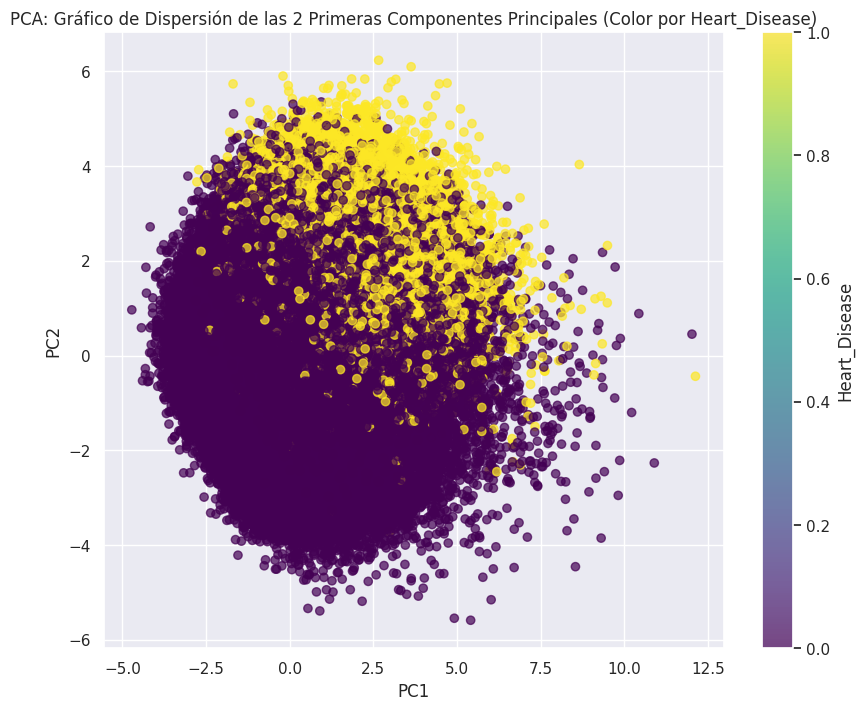

In [ ]:
componente_principal_1 = 'PC1'
componente_principal_2 = 'PC2'

# Seleccionar la columna para colorear los puntos
columna_color = 'Heart_Disease'

# Crear un gráfico de dispersión con colores según la columna seleccionada
plt.figure(figsize=(10, 8))
scatter = plt.scatter(ecv3_pca[componente_principal_1], ecv3_pca[componente_principal_2], c=ecv3[columna_color], cmap='viridis', alpha=0.7)

# Agregar etiquetas y título
plt.xlabel(componente_principal_1)
plt.ylabel(componente_principal_2)
plt.title(f'PCA: Gráfico de Dispersión de las 2 Primeras Componentes Principales (Color por {columna_color})')

# Añadir la barra de colores
plt.colorbar(scatter, label=columna_color)

# Mostrar el gráfico
plt.show()

In [ ]:
print(f'Proporción de varianza explicada por las dos primeras componentes: {pca.explained_variance_ratio_[:2].sum()}')


Proporción de varianza explicada por las dos primeras componentes: 0.24944361705389037


Los dos primeros componentes explican solo el 24.94% de la varianza, lo que indica que se esta perdiendo una gran parte de la información al visualizar solo estos dos componentes.

##Algortimo de SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = ecv3.drop('Heart_Disease', axis=1)
y = ecv3['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Creación del modelo SVM
modelo = SVC(C=0.1, kernel='rbf',random_state=42)

modelo.fit(X_train, y_train)

SVC(C=0.1, random_state=42)

In [ ]:
# Aplicar validación cruzada
cv_scores = cross_val_score(modelo, X, y, cv=5)

# Imprimir los resultados
print("Accuracy de cada pliegue:", cv_scores)
print("Accuracy promedio:", cv_scores.mean())

Accuracy de cada pliegue: [0.91954964 0.91953293 0.91954829 0.91954829 0.91954829]
Accuracy promedio: 0.9195454910207749


In [ ]:
predictions = modelo.predict(X_test)
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     82683
         1.0       0.00      0.00      0.00      7111

    accuracy                           0.92     89794
   macro avg       0.46      0.50      0.48     89794
weighted avg       0.85      0.92      0.88     89794



In [ ]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, predictions)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9208076263447447


###Insight

EL modelo SVM tiene una accuracy del 92%, pero tiene un muy mal desempeño en la clasificación de pacientes con ECV como positivos (Recall = 0 para ECV positivos)

##Conclusiones

El modelo de Regresión Logística aplicado con técnicas para manejar el desbalance de clases logró un recall (sensibilidad) de aproximadamente 80% y una precisión global (accuracy) del 73%. Esto indica que el modelo es capaz de identificar correctamente una gran parte de los pacientes con enfermedad cardiovascular (ECV), pero la precisión general está influenciada por el desbalance entre clases.

Para mejorar los resultados del modelo, sería beneficioso aumentar la proporción de pacientes con ECV en el dataset, ya que actualmente representan un porcentaje bajo. Esto permitiría al modelo aprender mejor las características de los casos con enfermedad. Además, podrían aplicarse otras técnicas de modelado adecuadas para datos desbalanceados, como sobremuestreo de la clase minoritaria (ECV), submuestreo de la clase mayoritaria o el uso de algoritmos específicos como XGBoost o SMOTE.

Otra vía para mejorar el rendimiento del modelo sería incluir variables adicionales que pueden influir significativamente en el diagnóstico, como:

-Historial de medicación (especialmente si el paciente está bajo tratamiento para factores de riesgo).

-Antecedentes de consumo de drogas de abuso, que pueden ser un factor determinante.

-Antecedentes de arritmia o fibrilación auricular, que están asociados a mayor riesgo cardiovascular.

Además, en un escenario clínico, como en la admisión de urgencias, se podrían incorporar variables clave para mejorar la precisión del modelo, tales como:

-Resultados de laboratorio al ingreso (niveles de troponina, colesterol, entre otros).

-Saturación de oxígeno, un indicador crítico en pacientes con enfermedades cardiacas.

-Alteraciones del ECG (electrocardiograma), ya que pueden ser un predictor importante de problemas cardíacos agudos.